# GIS 712: Environmental Earth Observation and Remote Sensing  
## Exploring Planet imagery for water classification—comparing PlanetScope and RapidEye

<img src="imgs/image.png" width="650">

The PlanetScope satellite constellation consists of multiple launches of groups of individual “small-satellites” (~200+ in total). Planet's on-orbit capacity is constantly improving in capability or quantity, with technology improvements deployed at a rapid pace. Each PlanetScope satellite is a CubeSat 3U form factor (10 cm by 10 cm by 30 cm). The complete PlanetScope is able to image the entire Earth every day (equating to a daily collection capacity of ~200 million km²/day).

The RapidEye satellite constellation consisted of five satellites that were able to collect over 6 million square kilometers of data per day at 6.5 meter GSD (at nadir). Each satellite measured less than one cubic meter and weighs 150 kg. These satellites were decomissioned in February 2020.

In this in-class and homework data activity we will continue to work on the Albemarle-Pamlico sound Peninsula/the Alligator River Basin, a coastal area in NC that is experiencing tree dieback (a.k.a. a ‘ghost forest’). 

We will be working with surface reflectance of PlanetScope and RapidEye OrthoTiles.

### Planet Surface reflectance

From Planet's product guide:

*"Planet’s Surface Reflectance (SR) Product is derived from the standard Analytic Product (Radiance) and is
processed to top-of-atmosphere reflectance and then atmospherically corrected to bottom-of-atmosphere
reflectance. This product ensures consistency across localized atmospheric conditions, minimizing uncertainty
in spectral response across time and location."*

*Surface Reflectance is available for all orthorectified scenes produced by radiometrically calibrated
sun-synchronous orbit Dove and RapidEye satellites. The Surface Reflectance product is available in the API as
the ‘analytic_sr’ asset under the PSScene4Band, PSOrthoTile, and REOrthoTile Itemtypes."*

### Planet Scope OrthoTiles

From Planet's website:

*"The PlanetScope Analytic Ortho Tile product is orthorectified, multispectral data from the satellite constellation. Analytic products are calibrated multispectral imagery products that have been processed to allow analysts to derive information products for data science and analytics. This product is designed for a wide variety of applications that require imagery with an accurate geolocation and cartographic projection. It has been processed to remove distortions caused by terrain and can be used for many data science and analytic applications. It eliminates the perspective effect on the ground (not on buildings), restoring the geometry of a vertical shot. The orthorectified visual imagery is optimal for value-added image processing including vegetation indices, land cover classifications, etc. In addition to orthorectification, the imagery has radiometric corrections applied to correct for any sensor artifacts and transformation to at- sensor radiance."*

From Planet's product guide:

<img src = "imgs/conversionOrtho.png" width = '400'>

### RapidEye OrthoTiles

From Planet's website:

*"The RapidEye Analytic Ortho Tile product is orthorectified, multispectral data from the RapidEye satellite constellation. This product is designed for a wide variety of applications that require imagery with an accurate geolocation and cartographic projection. It has been processed to remove distortions caused by terrain and can be used for many data science and analytic applications. It eliminates the perspective effect on the ground (not on buildings), restoring the geometry of a vertical shot. The orthorectified imagery is optimal for value-added image processing including vegetation indices, land cover classifications, etc. In addition to orthorectification, the imagery has radiometric corrections applied to correct for any sensor artifacts and transformation to at-sensor radiance."*

### More information can be found here:

https://www.planet.com/company/resources/




## OBJECTIVES:
 1. Learn how to source Planet imagery—if you don't already know this
 2. Understand the steps required to mosaic multiple PlanetScope and RapidEye OrthoTiles
 3. Understand how to employ Planet's surface reflectance orthotiles for water classification using band-ratio (Normalized Difference Water Index) combined with Otsu Thresholding.

## 1. Sourcing Planet imagery

Planet API allows you to easily draw a region of interest (ROI), apply filters (e.g. dates, cloud cover, view angle, sensor, area coverage, etc.), and download satellite images. You can explore the API [here](https://www.planet.com/).

<p style="color:green;"> You will need to login with your Education and Research Account. </p>

If you haven't already gotten an account, please register [here](https://www.planet.com/markets/education-and-research/) to get your Education and Research account. 
This account allows you to download up to 3,000 km^2  per month for free. 
Once you sign up, you should get a notification immediately telling you it may take 1 and up 
to 2 weeks to get an account/API key.
Once you've got an account, information on how to get your API key is 
available [here](https://support.planet.com/hc/en-us/articles/4572497499421-How-to-get-my-API-key-).

Go to the log on page [here](https://account.planet.com/signin).

Here is an example of what the API looks like:

<img src="imgs/API_searching.PNG" width="850">

## 2. Mosaic multiple PlanetScope and RapidEye orthotiles

The data that will be used for this exercise is available in the "data/NAME_OF_DATA" folder. The folder contains suface reflectance Orthotiles from PlanetScope and RapidEye Orthotiles. Load the **SR_clip.tiff** images to QGIS. How many do we have?

Do these images cover our entire study area?

We need to merge them (i.e. create an image mosaic).

Before we start working with the images you will probably need to install EarthPy and Skimage to your existing GIS712 conda environment, please do so by running the commands below with your GIS712 environment activated, using your anconda prompt (on PC) or at the terminal (if on Mac):

EarthPy (more info [here](https://pypi.org/project/earthpy/))

$ conda install -c conda-forge earthpy

Skimage (more info [here](https://scikit-image.org/docs/dev/install.html#install-via-conda))

$ conda install scikit-image

In [113]:
# import modules
import os
from glob import glob #here is a very useful package to list files in a folder
import rasterio 
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es
from skimage.filters import threshold_otsu
import numpy as np

2.1 PlanetScope Orthotiles

In [114]:
os.getcwd()

'c:\\Users\\cblim\\Documents\\NCSU\\Courses\\GIS712\\code\\Lectures\\Lecture08\\PlanetScope_RapidEye'

In [115]:
# list all PlanetScope imgs
PS_imgs = glob(os.path.join("data", "PlanetScope", '*SR_clip*.tif')) # note that we are using 2 wildcards here
# Q What is PS_imgs going to give us?

In [116]:
PS_imgs

['data\\PlanetScope\\2636276_1855510_2019-08-29_101e_BGRN_SR_clip.tif',
 'data\\PlanetScope\\2636276_1855511_2019-08-29_101e_BGRN_SR_clip.tif',
 'data\\PlanetScope\\2636276_1855610_2019-08-29_101e_BGRN_SR_clip.tif',
 'data\\PlanetScope\\2636276_1855611_2019-08-29_101e_BGRN_SR_clip.tif',
 'data\\PlanetScope\\2636361_1855610_2019-08-29_1012_BGRN_SR_clip.tif']

In [117]:
# using an empty list to store the images that we will be reading in with rasterio
PS_src_imgs = []

# lets loop through our list, open and append to PS_src_imgs
for img in PS_imgs:
    PS_src = rasterio.open(img)
    PS_src_imgs.append(PS_src)

# Q: What do you suppose PS_src_imgs will give us here?

In [118]:
# now we just need to mosaic the files within the source list using rasterio’s merge function
PS_mosaic, PS_out_trans = merge(PS_src_imgs)
# Read up on rasterio's merge: rasterio.merge.merge function here: 
# https://rasterio.readthedocs.io/en/latest/api/rasterio.merge.html
# Q: What is PS_mosaic, PS_out_trans going to give us?
# Q: What data type is PS_mosaic

In [119]:
print(PS_mosaic.dtype)
print(PS_mosaic.shape[1])
print(PS_mosaic.shape[2])

uint16
6780
6638


In [120]:
PS_out_trans

Affine(3.125, 0.0, 392062.5,
       0.0, -3.125, 3974843.75)

In [121]:
# Copy the metadata from the 1st file
PS_out_meta = PS_src_imgs[0].meta.copy()
PS_out_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 4006,
 'height': 2194,
 'count': 4,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(3.125, 0.0, 392062.5,
        0.0, -3.125, 3960596.875)}

In [122]:
# Update the metadata and use it to save the mosaic
PS_out_meta.update({"driver": "GTiff",
                 "height": PS_mosaic.shape[1],
                 "width": PS_mosaic.shape[2],
                 "transform": PS_out_trans})

In [123]:
# create path and name of PS mosaic
PS_path_name = "data/PlanetScope/PS_2019-08-29_mosaic.tif"
with rasterio.open(PS_path_name, "w", **PS_out_meta) as dest:
     dest.write(PS_mosaic)

CPLE_AppDefinedError: Deleting data/PlanetScope/PS_2019-08-29_mosaic.tif failed: Permission denied

Let's load the mosaic file in QGIS. 
 
 Q1: What is different compared to the previous 5 files?

 Q2: How do you make a true color image? 
 
 Q3: How do make a false color image?

#### A very useful package to vis and manipulate raster and vector data in python is EarthPy.

#### Why?

From the EathPy repo website:

*"Python is a generic programming language designed to support many different applications. Because of this, many commonly performed spatial tasks for science including plotting and working with spatial data take many steps of code. EarthPy builds upon the functionality developed for raster data (rasterio) and vector data (geopandas) in Python"*.

First let's check the bands of the moisaic file individually

<Axes: title={'center': 'nir band'}>

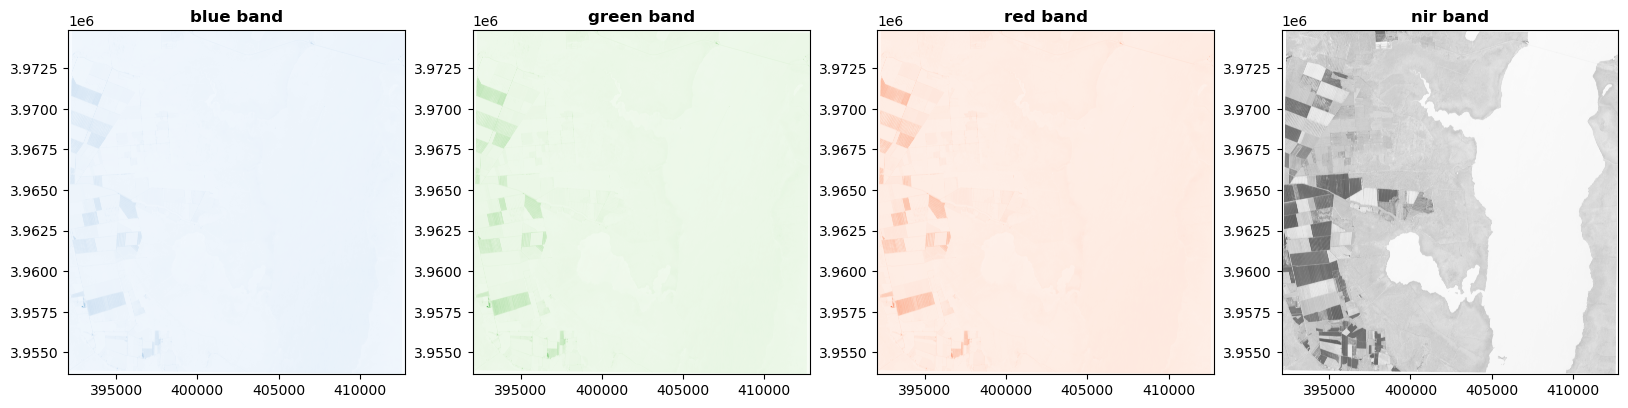

In [12]:
# get PS_final mosaic source
src = rasterio.open("data/PlanetScope/PS_2019-08-29_mosaic.tif")

# create fig and subplots!
fig, (axb, axg, axr, axn) = plt.subplots(1,4, figsize=(20,5))
show((src, 1), ax=axb, cmap='Blues', title='blue band')
show((src, 2), ax=axg, cmap='Greens', title='green band')
show((src, 3), ax=axr, cmap='Reds', title='red band')
show((src, 4), ax=axn, cmap='Greys', title='nir band')

Now let's use EarthPy to plot an RGB image!

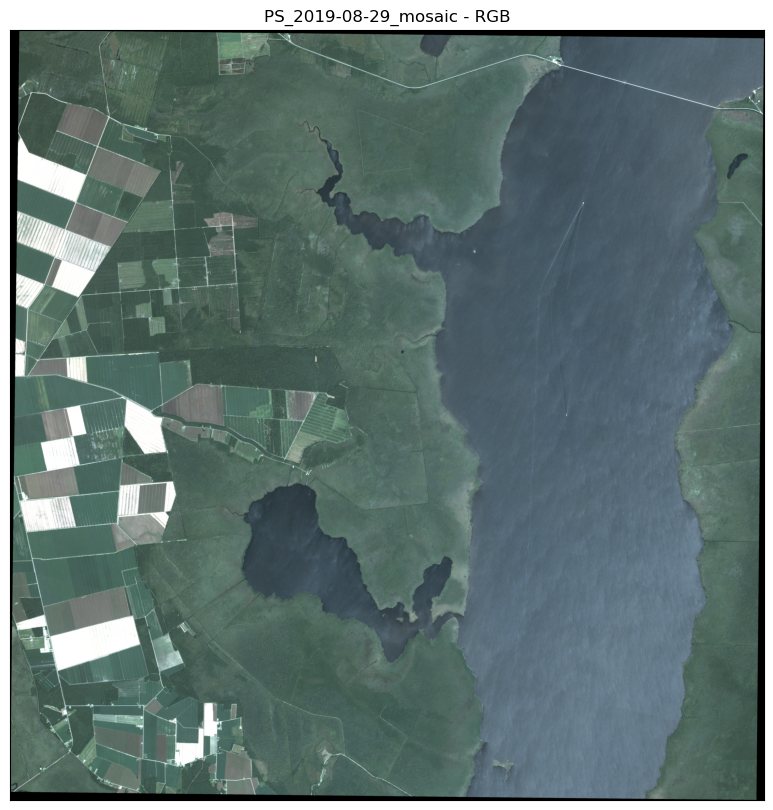

<Axes: title={'center': 'PS_2019-08-29_mosaic - RGB'}>

In [13]:
with rasterio.open("data/PlanetScope/PS_2019-08-29_mosaic.tif") as src:
    img_array = src.read()
# Ensure the input array doesn't have nodata values like -9999
# Use stretch = True
ep.plot_rgb(img_array,rgb=(2, 1, 0),stretch=True, title = "PS_2019-08-29_mosaic - RGB")

*In-class*: On your own, make a false color image using the ep package, using code similar to the one above. 

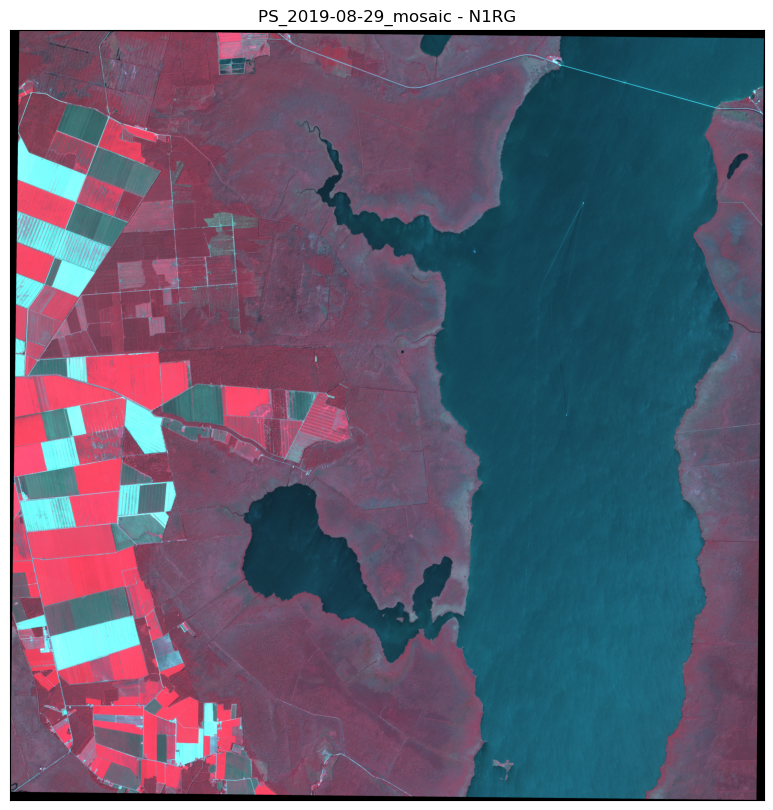

<Axes: title={'center': 'PS_2019-08-29_mosaic - N1RG'}>

In [14]:
with rasterio.open("data/PlanetScope/PS_2019-08-29_mosaic.tif") as src:
    img_array = src.read()
# Ensure the input array doesn't have nodata values like -9999
# Use stretch = True
ep.plot_rgb(img_array,rgb=(3, 2, 1),stretch=True, title = "PS_2019-08-29_mosaic - N1RG")

2.2 RapidEye Orthotiles

*In-class*: Using the example code above, can you modify the code as such that you can produce a mosaic of 
RapidEye images? 

PLEASE NAME YOUR RASTER LIKE SO "data/RapidEye/RE_2018-10-03_mosaic.tif"

In [15]:
RapidEye_imgs = sorted(glob(os.path.join("data", "RapidEye", "*Analytic_SR*.tif")))
RE_src_imgs = []

for img in RapidEye_imgs:
    RE_src = rasterio.open(img)
    RE_src_imgs.append(RE_src)

RE_mosaic, RE_out_trans = merge(RE_src_imgs)

RE_out_meta = RE_src_imgs[0].meta.copy()

RE_out_meta.update({"driver": "GTiff",
                    "height": RE_mosaic.shape[1],
                    "width": RE_mosaic.shape[2],
                    "transform": RE_out_trans})

img_name = "RE_2018-10-03_mosaic.tif"
RE_path_name = f"data/RapidEye/{img_name}"
with rasterio.open(RE_path_name, 'w', **RE_out_meta) as dest:
    dest.write(RE_mosaic)

*In-class*: Can you display the final plots of each band (pls note that RapidEye has more bands than PlanetScope, 5 more precisely (Blue, Green, Red, Red Edge, and NIR), you can use cmap='PuRd' for the RedEdge and cmap='Greys' for the NIR band for example) and then plot an RGB image just as we did before?

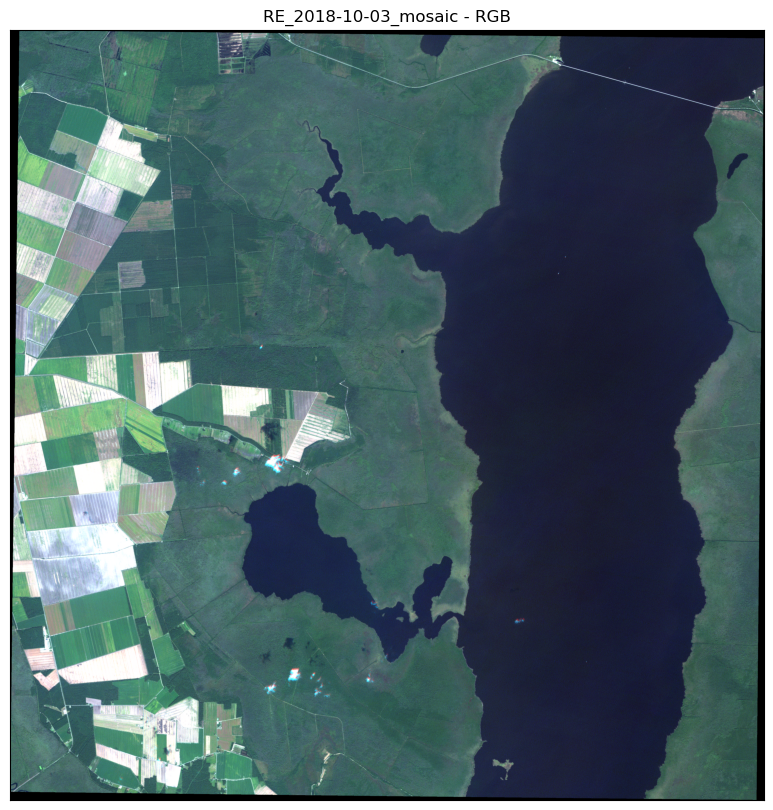

<Axes: title={'center': 'RE_2018-10-03_mosaic - RGB'}>

In [16]:
with rasterio.open(RE_path_name) as src:
    img_array = src.read()
# Ensure the input array doesn't have nodata values like -9999
# Use stretch = True
ep.plot_rgb(img_array,rgb=(2, 1, 0),stretch=True, title = f"{img_name.split('.tif')[0]} - RGB")

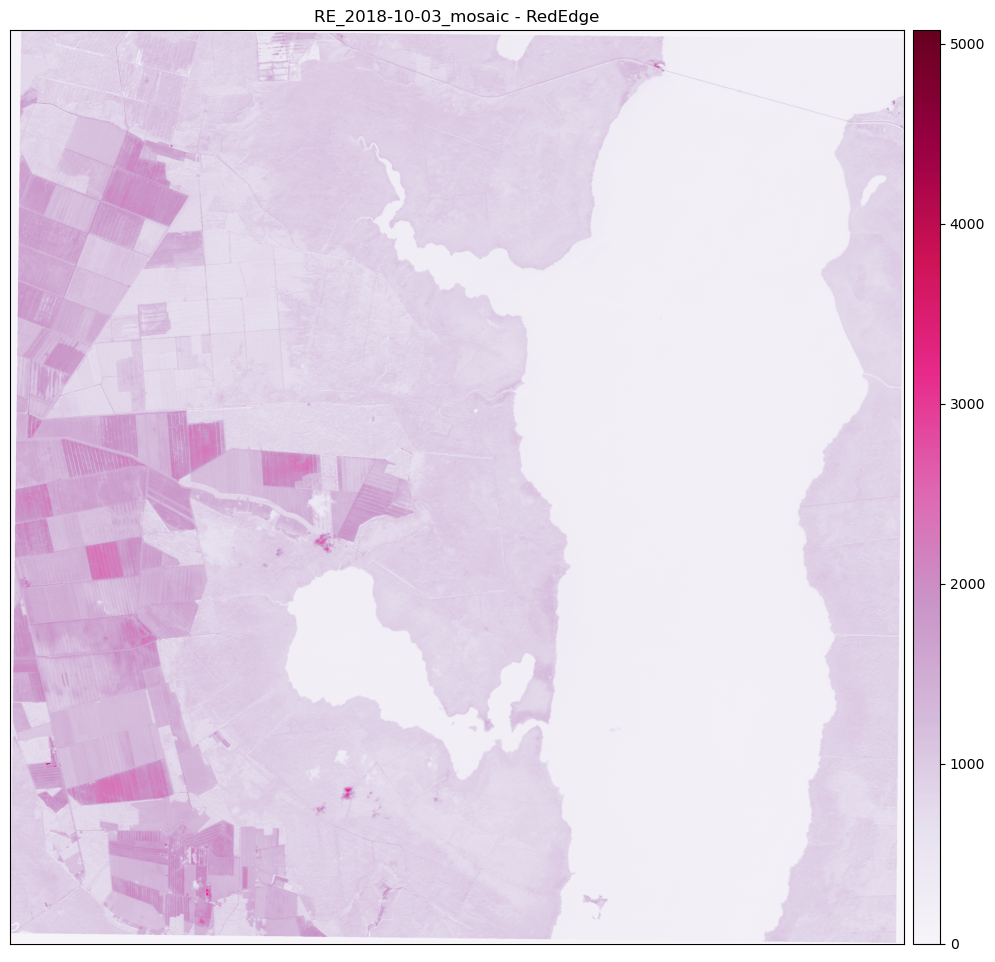

<Axes: title={'center': 'RE_2018-10-03_mosaic - RedEdge'}>

In [17]:
ep.plot_bands(img_array[3], cmap="PuRd", title=f"{img_name.split('.tif')[0]} - RedEdge")

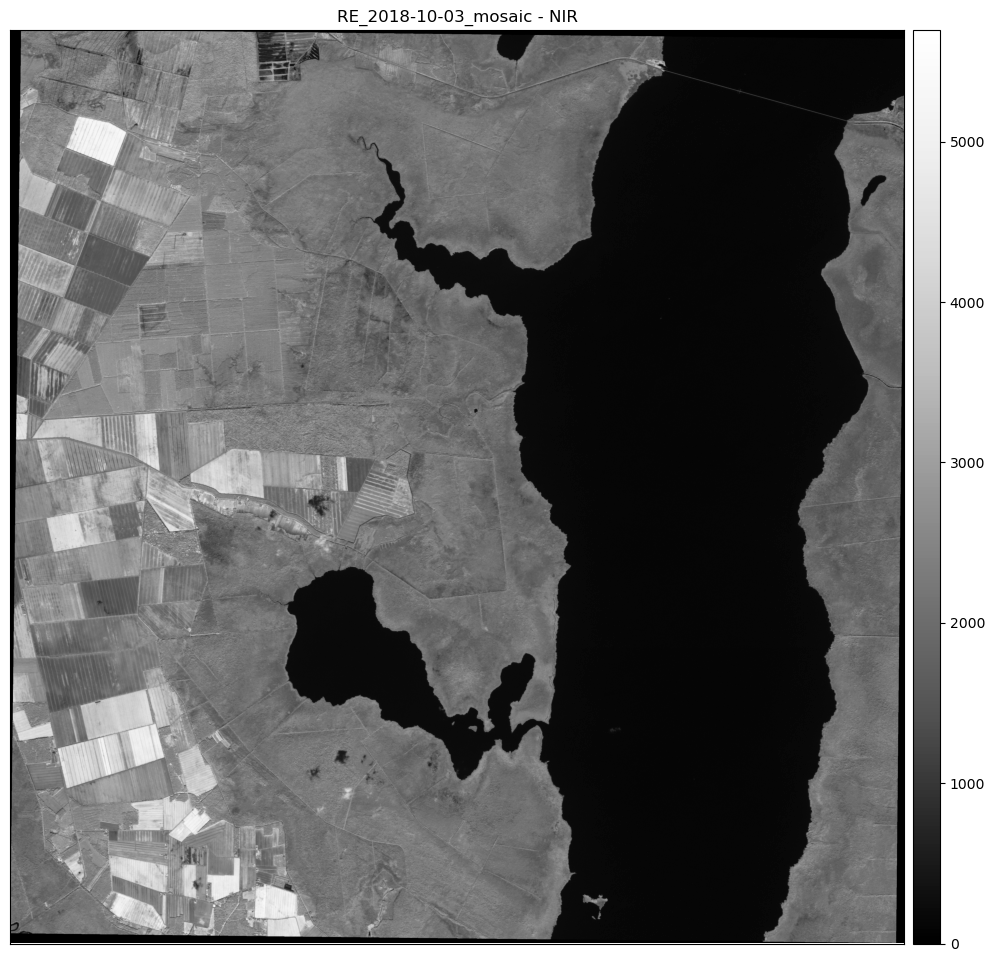

<Axes: title={'center': 'RE_2018-10-03_mosaic - NIR'}>

In [18]:
ep.plot_bands(img_array[-1], title=f"{img_name.split('.tif')[0]} - NIR")

Water classification using band-ratio (Normalized Difference Water Index) combined with Otsu Thresholding.

The Normalized Difference Water Index (NDWI) is defined as follows:

**NDWI = (GREEN - NIR)/ (GREEN + NIR)**

Values closer to 1 represent water pixels, and values closer -1 represent non-water pixels

In [19]:
# Open the raster files in read mode
PS_final = rasterio.open("data/PlanetScope/PS_2019-08-29_mosaic.tif")
# if you didn't name the RE mosaic as suggested you need to replace the name below to what you named yours
RE_final = rasterio.open("data/RapidEye/RE_2018-10-03_mosaic.tif") 

In [20]:
# Let's get the metadata
PS_meta = PS_final.profile
RE_meta = RE_final.profile

In [21]:
# Let's read the green bands and convert to float
PS_g = PS_final.read(2).astype('f4')
RE_g = RE_final.read(2).astype('f4')

In [22]:
# Read the NIR bands and convert to float
PS_nir = PS_final.read(4).astype('f4')
RE_nir = RE_final.read(5).astype('f4')

In [23]:
#calculate NDWI
PS_ndwi = (PS_g - PS_nir) / (PS_g + PS_nir)
RE_ndwi = (RE_g - RE_nir) / (RE_g + RE_nir)

C:\Users\cblim\AppData\Local\Temp\ipykernel_25368\2862550407.py:2: RuntimeWarning: invalid value encountered in divide
  PS_ndwi = (PS_g - PS_nir) / (PS_g + PS_nir)
C:\Users\cblim\AppData\Local\Temp\ipykernel_25368\2862550407.py:3: RuntimeWarning: invalid value encountered in divide
  RE_ndwi = (RE_g - RE_nir) / (RE_g + RE_nir)


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'PS NDWI distribution'}>)

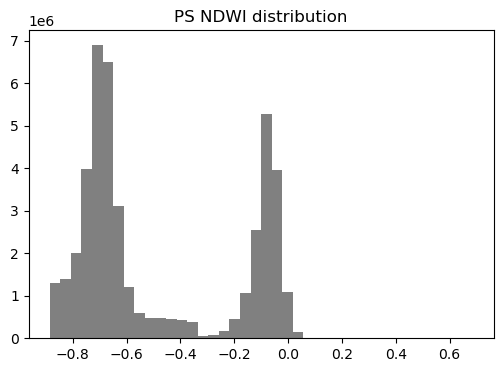

In [24]:
# let's plot using EarthPy functions
ep.hist(PS_ndwi,colors=["grey"],figsize=(6, 4), title="PS NDWI distribution", bins = 40)

Let's inspect the histogram above. Based on the histogram, what values should we use as vmin and vmax for plotting the NDWI image? 

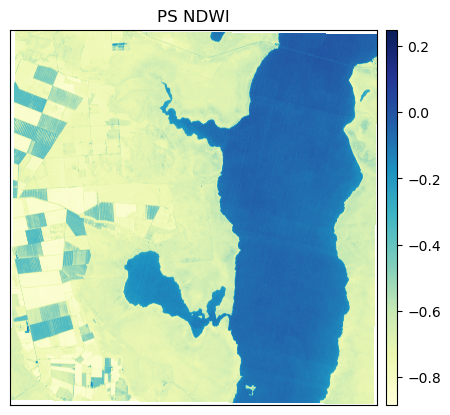

In [25]:
ep.plot_bands(PS_ndwi, 
              cmap='YlGnBu',
              scale=False, # whether or not the raster values should be automatically scaled (stretched) between their min and max values.
              #This sets the minimum value for the color scale to the minimum value in the PS_ndwi array, ignoring any NaN values.
              vmin=np.nanmin(PS_ndwi), vmax=0.25, # I set vmax after checking the histogram;
              title="PS NDWI",figsize=(5, 5))
plt.show()

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'RE NDWI distribution'}>)

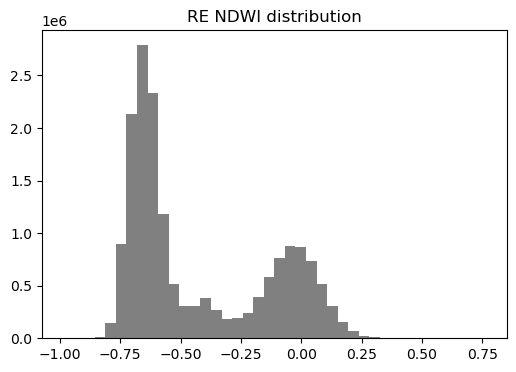

In [26]:
# let's do the same plot using EarthPy functions for the RE data
ep.hist(RE_ndwi ,colors=["grey"],figsize=(6, 4), title="RE NDWI distribution", bins = 40)

Similarly, let's inspect the RE histogram. What min and max values should we use to plot the RE NDWI image?

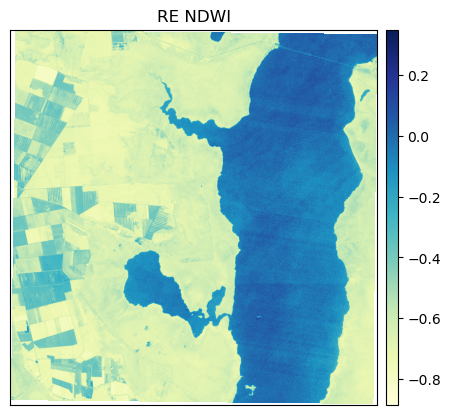

In [27]:
ep.plot_bands(RE_ndwi , 
              cmap='YlGnBu',
              scale=False,
              vmin=np.nanmin(PS_ndwi), vmax=0.35, # I set vnax after checking the histogram;
              title="RE NDWI",figsize=(5, 5))
plt.show()

From the histograms, we have a bimodal distribution of the pixels. But how do we separate these two classes (water and non-water pixels)?

We can use thresholding techniques to create a binary image. For this exercise, we will use Otsu threshold from the scikit-image module. 

* If the NDWI pixel value is greater than the threshold: the corresponding output pixel is marked as white (water)
* If the NDWI pixel value is less or equal to the threshold: the corresponding output pixel is marked as black (non-water)

To automatically used Otsu Threshold, we need 4 basic steps:  
    (1) Process the input image  
    (2) Obtain the image histogram (distribution of pixels)  
    (3) Compute the threshold value  
    (4) Replot the image pixels into those 2 regions, where the NDWI value is greater than the threshold (water/white) and lower than the threshold (not water/black)    

The method produces the new image by segmenting the pixels accouting for the variance within each class. The method works well with binary images because the histogram of such images contains two clearly expressed peaks (water and non-water).

Here is a good read about the algorithm: http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html

In [28]:
# Otsu Threshold
PS_otsu = threshold_otsu(PS_ndwi[~np.isnan(PS_ndwi)])
RE_otsu = threshold_otsu(RE_ndwi[~np.isnan(RE_ndwi)])
# PS_ndwi[~np.isnan(PS_ndwi)]: This part filters out any NaN (Not a Number) values from the PS_ndwi array. 
# The tilde ~ inverts the condition, meaning "give me everything that is not NaN."

Q: What Otsu thresholds did we get? Go back to the PS and RE histograms, do these threshold values make sense?

In [29]:
# Global Binary images
PS_binary = PS_ndwi > PS_otsu
PS_binary = PS_binary.astype(int) #zeros or ones

RE_binary = RE_ndwi > RE_otsu
RE_binary = RE_binary.astype(int) #zeros or ones

### Q: Now that you have a binary image, what can you do with it ? 

Remember that a binary image only has 0 values (non-water) and 1s (water).

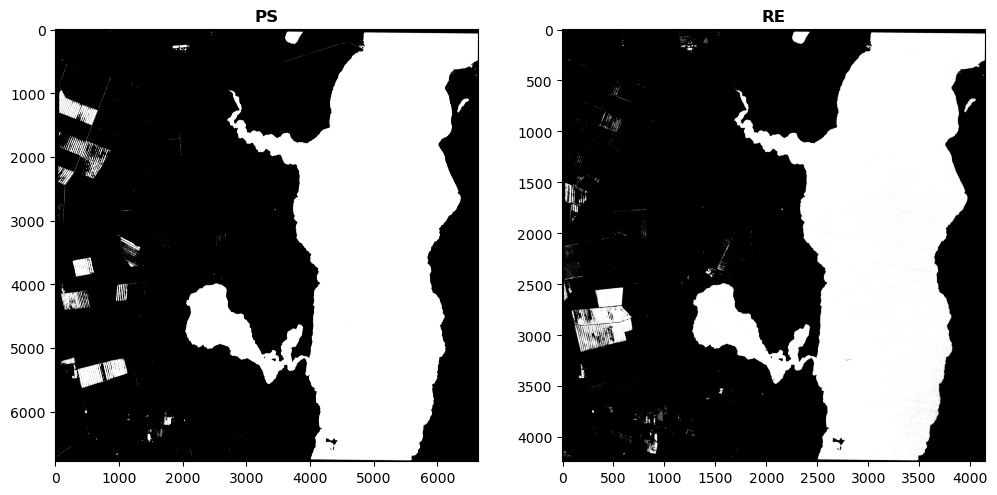

In [30]:
# plot the binary imgs
fig, (axps,axre) = plt.subplots(1,2, figsize=(12, 12))
show(PS_binary, ax=axps,cmap='Greys_r',  title='PS')
show(RE_binary, ax=axre,cmap='Greys_r',  title='RE')
plt.show()

Now let's check the image, hist and binary image side by side!

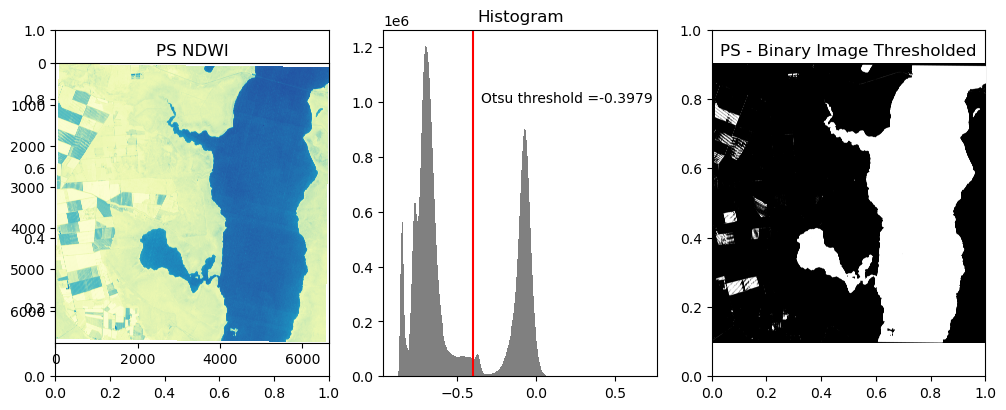

In [31]:
# Plotting images for PS
fig, axes = plt.subplots(ncols=3, figsize=(12,4.5))

# create axis to subpot
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1,adjustable='box')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0],adjustable='box')

ax[0].imshow(PS_ndwi, cmap='YlGnBu', vmin=np.nanmin(PS_ndwi), vmax=0.25)
ax[0].set_title('PS NDWI')

ax[1].hist(PS_ndwi.ravel(),color = 'grey', bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(PS_otsu, color='r')
ax[1].annotate('Otsu threshold ={0}'.format(str(round(PS_otsu,4))), xy=(-0.35, 1E6))

ax[2].imshow(PS_binary, cmap=plt.cm.gray)
ax[2].set_title('PS - Binary Image Thresholded')
ax[2].axis('off')

plt.show()

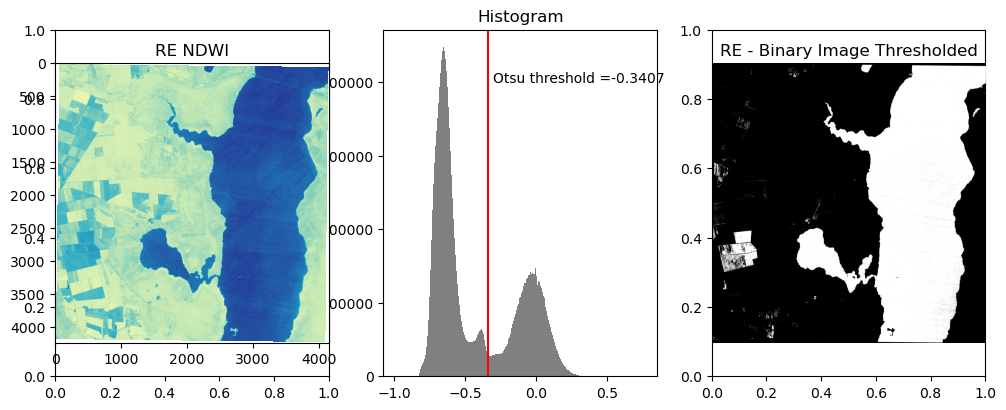

In [32]:
# Plotting images for RE
fig, axes = plt.subplots(ncols=3, figsize=(12,4.5))

# create axis to subpot
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1,adjustable='box')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0],adjustable='box')

ax[0].imshow(RE_ndwi, cmap='YlGnBu', vmin=np.nanmin(RE_ndwi), vmax=0.25)
ax[0].set_title('RE NDWI')

ax[1].hist(RE_ndwi.ravel(),color = 'grey', bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(RE_otsu, color='r')
ax[1].annotate('Otsu threshold ={0}'.format(str(round(RE_otsu,4))), xy=(-0.30, 4E5))

ax[2].imshow(RE_binary, cmap=plt.cm.gray)
ax[2].set_title('RE - Binary Image Thresholded')
ax[2].axis('off')

plt.show()

## Homework - 8 points

(Q1) Comment on the differences between PlanetScope and RapidEye OrthoTiles. 2 points

In accordance to the [documentation](https://www.nv5geospatialsoftware.com/Portals/0/pdfs/PlanetScope-RapidEye-Spec-Sheet.pdf) on PlanetScope & RapidEye products, the processing method to generate the OrthoTile products are essentially the same. The only difference that I could tell between the two was that the PlanetScope OrthoTile products imagery is "... collected as a series of overlapping framed scenes from a single satellite in a single pass. These scenes are subsequently orthorectified and an ortho tile is then generated from a collection of consecutive scenes, typically 4 to 5.", where I did not see this process listed for RapidEye. I believe this makes sense as there are many more PlanetScope satellites deployed at one time (175+) as opposed to the 5 RapidEye Satellites. This may be one of the reasons as to some of the differences between the resultant water masks derived from the NDWI products between PlanetScope & RapidEye. The PlanetScope OrthoTiles have higher resolution than the RapidEye OrthoTiles. RapidEye has 5-bands (Blue, Green, Red, RedEdge Near-Infrared (NIR)), while PlanetScope only has 4-bands (Blue, Green, Red, NIR). Further inspection upon the wavelengths of the bands between [PlanetScope](https://developers.planet.com/docs/apis/data/sensors/) & [RapidEye](https://www.satimagingcorp.com/satellite-sensors/other-satellite-sensors/rapideye/) show differences in the wavelength ranges for the spectral bands.
    1. Blue - PlanetScope: 455 - 515 nm, RapidEye: 440 - 510 nm
    2. Green - PlanetScope: 500 - 590 nm, RapidEye: 520 - 590 nm
    3. Red - PlanetScope: 590 - 670 nm, RapidEye: 630 - 685 nm
    4. RedEdge - PlanetScope: N/A, RapidEye: 690 - 730 nm
    5. NIR - PlanetScope: 780 - 860 nm, RapidEye: 760 - 850 nm

Specifically for NDWI calculations, we care about the green and NIR bands. We can see that there are differences between the PlanetScope & RapidEye wavelengths for these bands. The wavelength range of the green band for PlanetScope is slightly wider than the wavelength range for RapidEye's green band. The wavelength range of the NIR for PlanetScope is slightly more narrow than the wavelength range for RapidEye's NIR band. This difference in wavelength range at which the sensor's respond to may be an additional reason for differences between the derived water masks for PlanetScope & RapidEye.

(Q2) Using the binary images (from the class exercise: PS_binary and RE_binary), calculate water inundation area for both images, and plot your results with using a bar graph. 2 points

HINT: check the spatial resolution for both products.

(Q3) Using the NDWI images (PS_ndwi and RE_ndwi) separate water from land using a fixed threshold of your choice, try to find an optimum threshold. Comment on the advantages and disadvantages of using the Otsu Threshold. Plot your results by comparing the area obtained from your threshold with the results obtained from Otsu (you can use a bar graph here as well). Plot the binary images side by side (i.e., For PS: Yours vs Otsu and for RE: Yours vs Otsu). 3 points

Comments on the advantages and disadvantages of using the Otsu Threshold are intertwined with the comparison plots below to use our results to help provide arguments for our comments.

In [86]:
from pathlib import Path
from typing import Optional

def get_mosaic_filepath(planet: bool = False, rapid_eye: bool = False, subdirs: Optional[dict[str, str]] = None) -> Path:
    if not planet and not rapid_eye:
        raise RuntimeError(f"Must choose to get mosaic filepath from: '[planet or rapid_eye]'")
    
    if subdirs is None:
        subdirs = {"planet": "data/PlanetScope", "rapideye": "data/RapidEye"}

    if planet:
        subdir = subdirs["planet"]
    else:
        subdir = subdirs["rapideye"]

    mosaic_filepaths = sorted(glob(f"{subdir}/*mosaic*.tif"))
    if len(mosaic_filepaths) == 0:
        raise RuntimeError(f"No mosaic filepath found at '{subdir}' for {'planet' if planet else 'rapideye'}")
    elif len(mosaic_filepaths) > 1:
        print(f"Found '{len(mosaic_filepaths)}' mosaic filepaths at '{subdir}' for {'planet' if planet else 'rapideye'}...Returning '{mosaic_filepaths[0]}'")
    return Path(mosaic_filepaths[0]).resolve()

PS_mosaic_filepath = get_mosaic_filepath(planet=True)
RE_mosaic_filepath = get_mosaic_filepath(rapid_eye=True)

print(f"Planet Scope Mosaic Filepath: {PS_mosaic_filepath}\n"
      f"Rapid Eye Mosaic Filepath: {RE_mosaic_filepath}")

Planet Scope Mosaic Filepath: C:\Users\cblim\Documents\NCSU\Courses\GIS712\code\Lectures\Lecture08\PlanetScope_RapidEye\data\PlanetScope\PS_2019-08-29_mosaic.tif
Rapid Eye Mosaic Filepath: C:\Users\cblim\Documents\NCSU\Courses\GIS712\code\Lectures\Lecture08\PlanetScope_RapidEye\data\RapidEye\RE_2018-10-03_mosaic.tif


Pixel Size: 3.125
Planet Scope:
	Total Area: 439.508203125 km^2
	Water Inundation Area: 150.98810546875 km^2

	Water Inundation Area Percentage of Total Area: 34.35%

Pixel Size: 5.0
Rapid Eye:
	Total Area: 439.58655 km^2
	Water Inundation Area: 149.1913 km^2

	Water Inundation Area Percentage of Total Area: 33.94%


C:\Users\cblim\AppData\Local\Temp\ipykernel_25368\2307572079.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


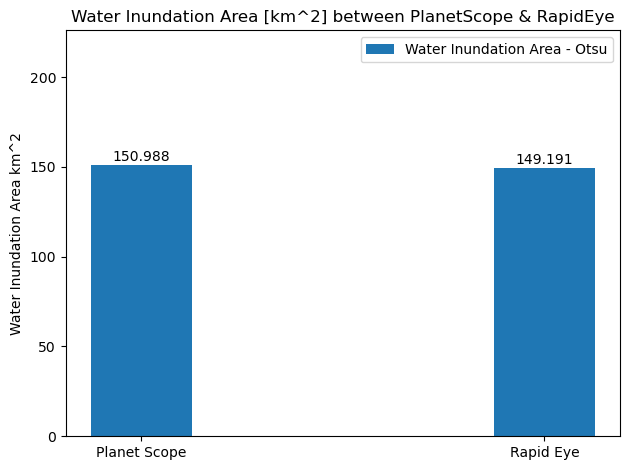

In [110]:
# Q2
from typing import Union, Optional


def read_raster(raster_path: Union[str, Path]) -> tuple[np.ndarray, dict]:
    with rasterio.open(str(raster_path)) as src:
        ds = src.read()
        meta = src.meta.copy()

    return ds, meta

def calculate_water_inundation_area(raster_path: Union[str, Path], water_mask: np.ndarray) -> float:
    _, metadata = read_raster(raster_path)

    px_size = abs(metadata["transform"][0])
    print(f"Pixel Size: {px_size}")

    water_area = np.sum(water_mask) * (px_size ** 2)

    return water_area

def calculate_total_area_of_raster(raster_path: Union[str, Path]) -> float:
    _, metadata = read_raster(raster_path)

    width, height = metadata["width"], metadata["height"]
    px_size = abs(metadata["transform"][0])

    return width * height * (px_size ** 2)

def calculate_and_print_water_inundation_information(raster_path: Union[str, Path], water_mask: np.ndarray, raster_desc: Optional[str] = None) -> tuple[float, float]:
    """
    @param raster_path: path to raster
    @param water_mask: water mask numpy array
    @param raster_desc: Optional description of raster

    @returns: water inundation area in m^2, water inundation area percentage of total raster area
    """
    water_inundation_area = calculate_water_inundation_area(raster_path, water_mask)
    total_area = calculate_total_area_of_raster(raster_path)
    water_inundation_area_percentage = (water_inundation_area / total_area) * 100

    print(f"{raster_desc if raster_desc is not None else 'Raster'}:\n"
          f"\tTotal Area: {total_area / (1000 ** 2)} km^2\n"
          f"\tWater Inundation Area: {water_inundation_area / (1000 ** 2)} km^2\n\n"
          f"\tWater Inundation Area Percentage of Total Area: {water_inundation_area_percentage:.2f}%")
    
    return water_inundation_area, water_inundation_area_percentage

PS_water_inundation_area, PS_water_inundation_area_percentage = calculate_and_print_water_inundation_information(PS_mosaic_filepath, PS_binary, raster_desc="Planet Scope")
print()
RE_water_inundation_area, RE_water_inundation_area_percentage = calculate_and_print_water_inundation_information(RE_mosaic_filepath, RE_binary, raster_desc="Rapid Eye")

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def water_inundation_area_barplot(values_to_plot: dict[str, tuple[float, ...]], object_desc: Optional[tuple[str, ...]] = None):
    if object_desc is None:
        object_desc = ("Planet Scope", "Rapid Eye")

    x = np.arange(len(object_desc))
    width = 0.25
    mult = 0

    fig, ax = plt.subplots(layout='constrained')
    for key, vals in values_to_plot.items():
        offset = width * mult
        if len(values_to_plot.keys()) == 1:
            rects = ax.bar(x, vals, width, label=key)
        else:
            rects = ax.bar(x + offset, vals, width, label=key)
        ax.bar_label(rects, padding=1)
        mult += 1

    ax.set_ylabel("Water Inundation Area km^2")
    ax.set_title("Water Inundation Area [km^2] between PlanetScope & RapidEye")
    if len(values_to_plot.keys()) == 1:
        ax.set_xticks(x, object_desc)
    else:
        ax.set_xticks(x + (width / 2), object_desc)
    ax.legend(loc='upper right', ncols=len(values_to_plot.keys()))
    ax.set_ylim(0, np.max([val for val in list(values_to_plot.values())]) + np.mean(list(values_to_plot.values())) / 2)
    plt.tight_layout()

    plt.show()
    plt.close()

water_inundation_areas: dict[str, tuple[float, ...]] = {
    "Water Inundation Area - Otsu": (
        PS_water_inundation_area / (1000 ** 2),
        RE_water_inundation_area / (1000 ** 2),
    ),
    # "Water Inundation Area Percentage": (
    #     PS_water_inundation_area_percentage,
    #     RE_water_inundation_area_percentage
    # )
}

water_inundation_area_barplot(water_inundation_areas)

Planet Scope Minimum Optimal Threshold: -0.3151
Rapid Eye Minimum Optimal Threshold: -0.3304
Pixel Size: 3.125
Planet Scope:
	Total Area: 439.508203125 km^2
	Water Inundation Area: 144.448525390625 km^2

	Water Inundation Area Percentage of Total Area: 32.87%
Pixel Size: 5.0
Rapid Eye:
	Total Area: 439.58655 km^2
	Water Inundation Area: 148.114 km^2

	Water Inundation Area Percentage of Total Area: 33.69%


C:\Users\cblim\AppData\Local\Temp\ipykernel_25368\2307572079.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


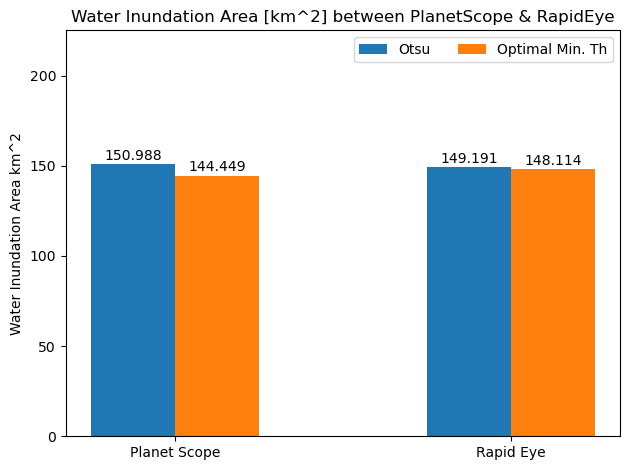

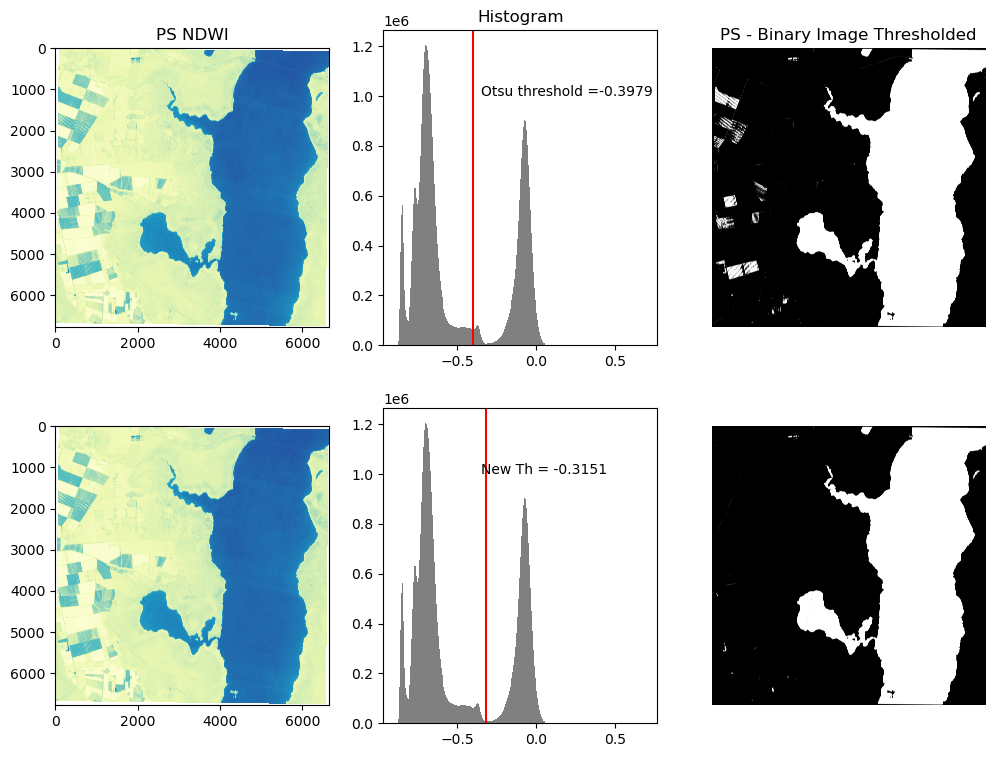

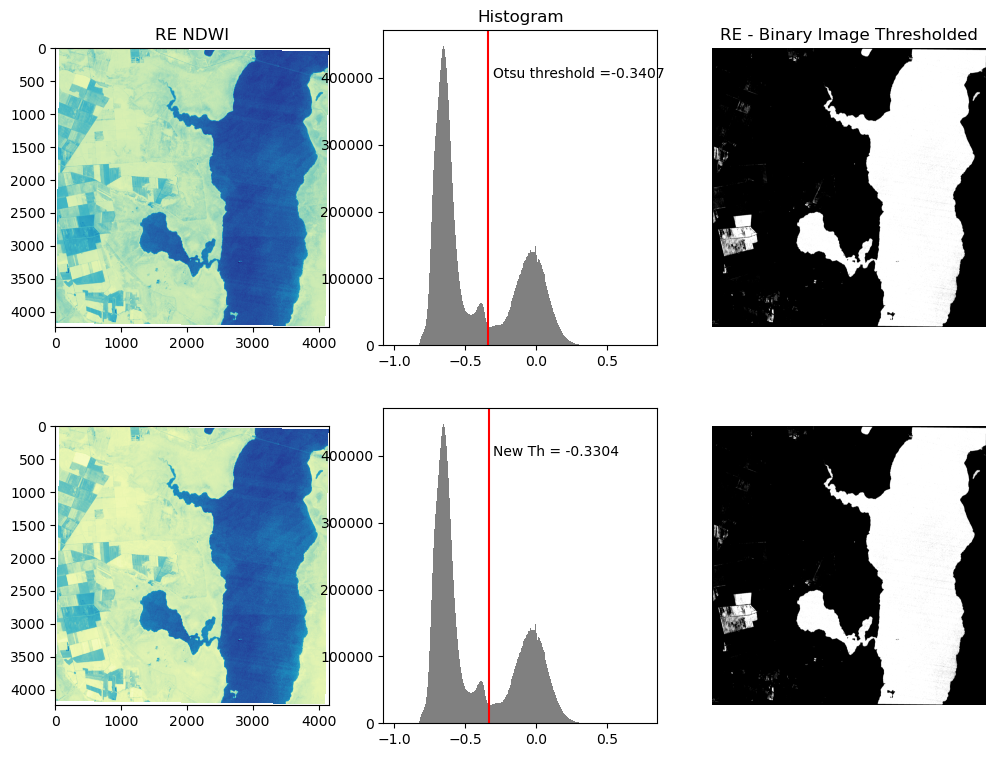

In [111]:
# Q3

# utility functions to more easily plot before & after with different thresholds
def plot_planetscope(new_th: float):
    # Plotting images for PS
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

    axes[0, 0].imshow(PS_ndwi, cmap='YlGnBu', vmin=np.nanmin(PS_ndwi), vmax=0.25)
    axes[0, 0].set_title('PS NDWI')

    axes[0, 1].hist(PS_ndwi.ravel(),color = 'grey', bins=256)
    axes[0, 1].set_title('Histogram')
    axes[0, 1].axvline(PS_otsu, color='r')
    axes[0, 1].annotate('Otsu threshold ={0}'.format(str(round(PS_otsu,4))), xy=(-0.35, 1E6))

    axes[0, 2].imshow(PS_binary, cmap=plt.cm.gray)
    axes[0, 2].set_title('PS - Binary Image Thresholded')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(PS_ndwi, cmap="YlGnBu", vmin=np.nanmin(PS_ndwi), vmax=0.25)
    
    axes[1, 1].hist(PS_ndwi.ravel(), color="grey", bins=256)
    axes[1, 1].axvline(new_th, color='r')
    axes[1, 1].annotate(f"New Th = {new_th:.4f}", xy=(-0.35, 1e6))

    new_binary = (PS_ndwi > new_th).astype(int)
    axes[1, 2].imshow(new_binary, cmap=plt.cm.gray)
    axes[1, 2].axis('off')

    plt.show()
    plt.close()


def plot_rapideye(new_th: float):
    # Plotting images for RE
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

    axes[0, 0].imshow(RE_ndwi, cmap='YlGnBu', vmin=np.nanmin(RE_ndwi), vmax=0.25)
    axes[0, 0].set_title('RE NDWI')

    axes[0, 1].hist(RE_ndwi.ravel(),color = 'grey', bins=256)
    axes[0, 1].set_title('Histogram')
    axes[0, 1].axvline(RE_otsu, color='r')
    axes[0, 1].annotate('Otsu threshold ={0}'.format(str(round(RE_otsu,4))), xy=(-0.30, 4E5))

    axes[0, 2].imshow(RE_binary, cmap=plt.cm.gray)
    axes[0, 2].set_title('RE - Binary Image Thresholded')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(RE_ndwi, cmap="YlGnBu", vmin=np.nanmin(PS_ndwi), vmax=0.25)
    
    axes[1, 1].hist(RE_ndwi.ravel(), color="grey", bins=256)
    axes[1, 1].axvline(new_th, color='r')
    axes[1, 1].annotate(f"New Th = {new_th:.4f}", xy=(-0.30, 4e5))

    new_binary = (RE_ndwi > new_th).astype(int)
    axes[1, 2].imshow(new_binary, cmap=plt.cm.gray)
    axes[1, 2].axis('off')

    plt.show()
    plt.close()

# get minimum of PS & RE histograms within specified ranges from manually inspecting the NDWI histograms to test as optimal threshold
def get_minimum_optimal_th_from_range(ndwi: np.ndarray, bin_range: tuple[float, float]) -> float:
    hist, bin_edges = np.histogram(ndwi.ravel()[np.where(~np.isnan(ndwi.ravel()))], bins=256)
    bin_edges_in_range_idx = np.where((bin_edges >= bin_range[0]) & (bin_edges <= bin_range[1]))
    bin_edges_min_idx = np.where(hist[bin_edges_in_range_idx] == np.min(hist[bin_edges_in_range_idx]))
    return bin_edges[bin_edges_in_range_idx[0][bin_edges_min_idx]][0]

PS_range: tuple[float, float] = (PS_otsu - 0.1, -0.1)
PS_opt_th = get_minimum_optimal_th_from_range(PS_ndwi, PS_range)

RE_range: tuple[float, float] = (RE_otsu - 0.1, 0.0)
RE_opt_th = get_minimum_optimal_th_from_range(RE_ndwi, RE_range)

print(f"Planet Scope Minimum Optimal Threshold: {PS_opt_th:.4f}\n"
      f"Rapid Eye Minimum Optimal Threshold: {RE_opt_th:.4f}")

PS_new_water_mask = (PS_ndwi > PS_opt_th).astype(int)
RE_new_water_mask = (RE_ndwi > RE_opt_th).astype(int)

PS_new_water_area, _ = calculate_and_print_water_inundation_information(raster_path=PS_mosaic_filepath, water_mask=PS_new_water_mask, raster_desc="Planet Scope")
RE_new_water_area, _ = calculate_and_print_water_inundation_information(raster_path=RE_mosaic_filepath, water_mask=RE_new_water_mask, raster_desc="Rapid Eye")

water_inundations: dict[str, tuple[float, ...]] = water_inundation_areas.copy()
water_inundations["Otsu"] = water_inundations.pop("Water Inundation Area - Otsu")
water_inundations["Optimal Min. Th"] = (PS_new_water_area / (1000 ** 2), RE_new_water_area / (1000 ** 2))
water_inundation_area_barplot(water_inundations)

plot_planetscope(new_th=PS_opt_th)
plot_rapideye(new_th=RE_opt_th)

The updated threshold for the Planet Scope NDWI looks to significantly improve the binary water mask, with small areas of cropfields still being classified as water. This could most likely be fixed by applying a morphological opening operation (erosion + dilation) to get rid of these small areas. We could also experiment with using an updated threshold that is slightly larger in value, e.g., -0.3051.

The updated threshold for the Rapid Eye NDWI does not improve much upon the original binary water mask, where there are still large areas of cropfields being classified as water. We will use an updated threshold of -0.31 and see if this helps.

Planet Scope Visual Optimal Threshold: -0.2500
Rapid Eye Visual Optimal Threshold: -0.2100
Pixel Size: 3.125
Planet Scope:
	Total Area: 439.508203125 km^2
	Water Inundation Area: 143.363740234375 km^2

	Water Inundation Area Percentage of Total Area: 32.62%
Pixel Size: 5.0
Rapid Eye:
	Total Area: 439.58655 km^2
	Water Inundation Area: 134.367125 km^2

	Water Inundation Area Percentage of Total Area: 30.57%


C:\Users\cblim\AppData\Local\Temp\ipykernel_25368\2307572079.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


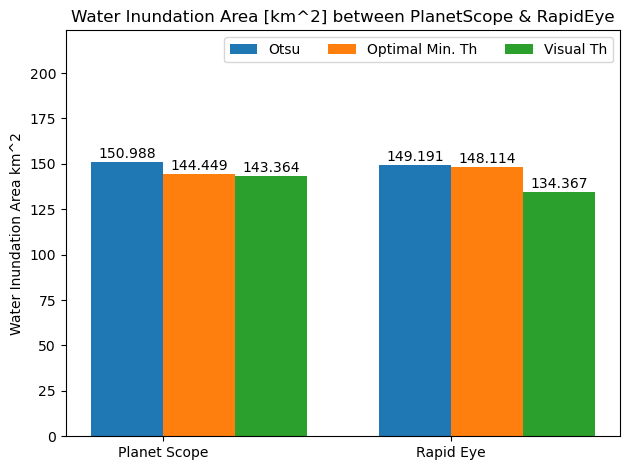

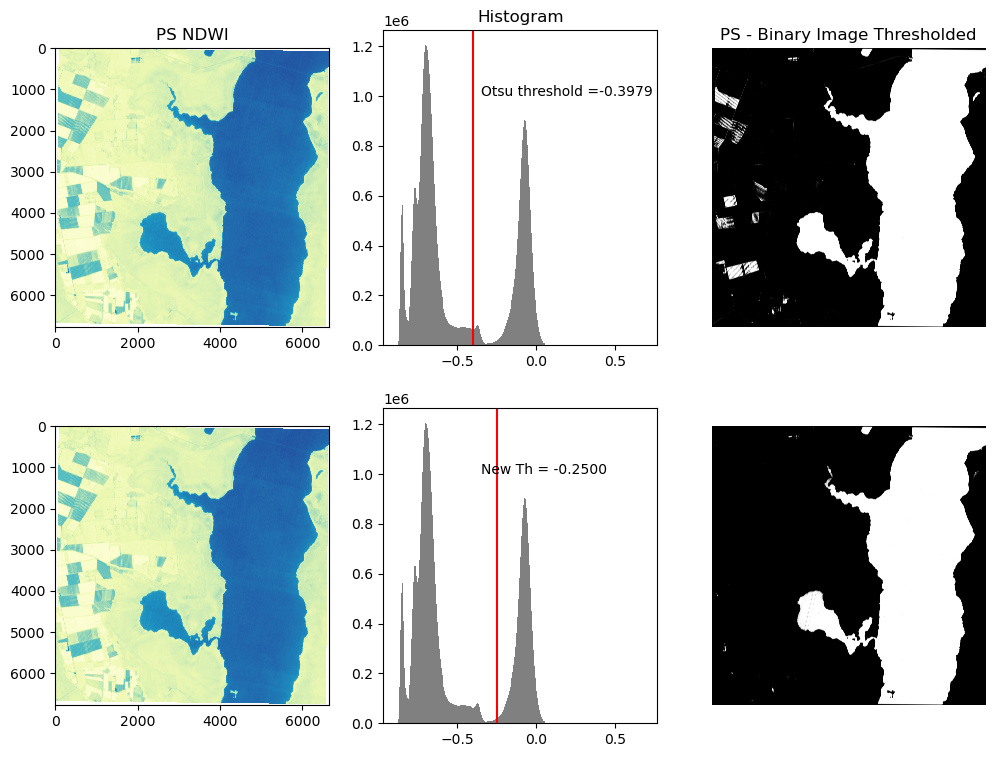

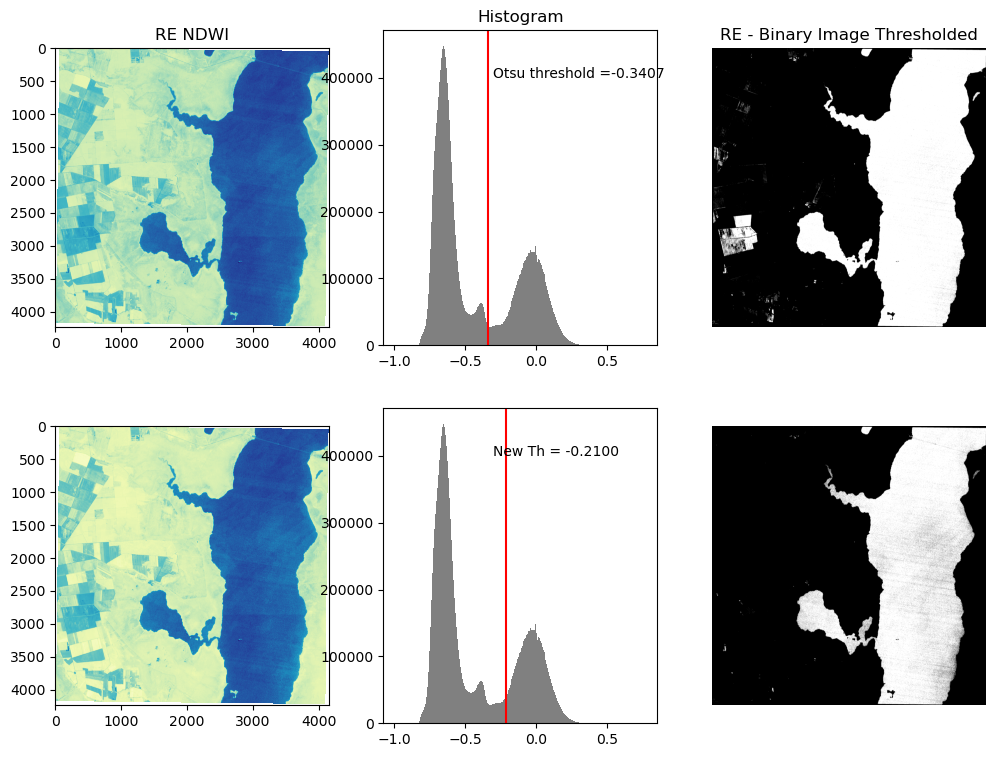

In [112]:
# PS_vis_th = -0.3051  # not much change
PS_vis_th = -0.25
# RE_vis_th = -0.31  # still not very good
RE_vis_th = -0.21

print(f"Planet Scope Visual Optimal Threshold: {PS_vis_th:.4f}\n"
      f"Rapid Eye Visual Optimal Threshold: {RE_vis_th:.4f}")

PS_new_water_mask = (PS_ndwi > PS_vis_th).astype(int)
RE_new_water_mask = (RE_ndwi > RE_vis_th).astype(int)

PS_new_water_area, _ = calculate_and_print_water_inundation_information(raster_path=PS_mosaic_filepath, water_mask=PS_new_water_mask, raster_desc="Planet Scope")
RE_new_water_area, _ = calculate_and_print_water_inundation_information(raster_path=RE_mosaic_filepath, water_mask=RE_new_water_mask, raster_desc="Rapid Eye")

water_inundations["Visual Th"] = (PS_new_water_area / (1000 ** 2), RE_new_water_area / (1000 ** 2))
water_inundation_area_barplot(water_inundations)

plot_planetscope(new_th=PS_vis_th)
plot_rapideye(new_th=RE_vis_th)

We can see that after updating the threshold for Planet Scope to -0.25, we are still unable to fully get rid of the specks of cropfields being classified as water as are beginning to slightly get rid of some of the river's finger in the top left of the river. In this case, I think it would be better to maintain the original optimal minimum threshold that was automatically calculated between the range of the otsu's threshold and apply a morphological opening operation to try and get rid of some smaller misclassifications.

We can also see that we have greatly enhanced the water mask for Rapid Eye by iterating over different thresholds. However, there is a shading of water pixels that are getting removed within the river, which is most likely not what we would want. In this case, I think it would be best to use this latest threshold and apply a morphological opening operation followed by a morphological closing operation with a slightly larger radius than the opening operation as to try and rectify the water mask within the river. However, this may get rid of some of the small islands in the river, which, depending on the application of this mask may be undesirable. Additionally, the opening pass may reduce some areas of the shoreline, if there are insufficient pixels around edges of the shoreline, which may be an issue on the lower right side of the river, so that is also something to keep in mind when applying the morphological operators.

We will comment on the advantages and disadvantages of Otsu's threshold, with respect to the outputs we have just seen. An immediate advantage of Otsu's threshold is that it is automatic and is very easy to apply to images; thus, resulting in masks being made efficiently for images. One disadvantage is the quality of the threshold and the resulting mask. The mask may not be suitably thresholded for the desired application, containing some misclassifications or perhaps missing some of the desired classification areas. However, leveraging Otsu's threshold is still advantageous as a starting point, b/c the resulting mask can be used as a basis and manual intervention to refine the water masks will drastically be reduced. Another disadvantage is that we must know what kind of product to give to Otsu's for it to behave in a way that makes sense to our application. In this example, we had to derive the NDWI raster and perform Otsu's thresholding on that, which is still some form of human intervention and decision making as to what is the best product to use to generate a water mask. Ideally, it would be most beneficial to have some model that can extract the requisite information automatically with just an input raster.